In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Conv2D, MaxPool2D, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, array_to_img, img_to_array
from sklearn.metrics import confusion_matrix
from tensorflow.keras import datasets, layers, models

import os


# Uploading the Data

In [2]:
train_dir = 'data/kaggle dataset/chest_xray/train'
test_dir = 'data/kaggle dataset/chest_xray/test'
val_dir = 'data/kaggle dataset/chest_xray/val'

In [3]:
train_norm_dir = os.path.join(train_dir, 'NORMAL')
train_pneu_dir = os.path.join(train_dir, 'PNEUMONIA')
val_norm_dir = os.path.join(val_dir, 'NORMAL')
val_pneu_dir = os.path.join(val_dir, 'PNEUMONIA')
train_norm_dir 

'data/kaggle dataset/chest_xray/train\\NORMAL'

In [4]:
len(os.listdir(train_norm_dir))

1341

In [5]:
def picture(filepath):
    filenames = os.listdir(filepath)
    filepaths = [os.path.join(filepath, name) for name in filenames]
    return [mpimg.imread(img) for img in filepaths]

In [6]:
train_norm_images = picture(train_norm_dir)
train_pneu_images = picture(train_pneu_dir)

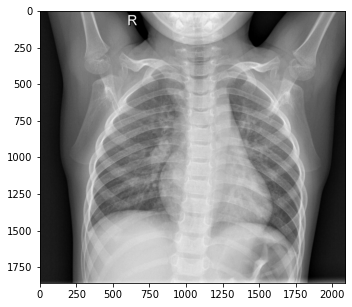

In [7]:
fig, axs = plt.subplots(figsize=(20, 5))

axs.imshow(train_norm_images[0], cmap='gray');

# Creating Test/Train Batches

In [18]:
# get all the data in the directory split/test (180 images), and reshape them
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_dir, 
        target_size=(64, 64), batch_size = 180) 

# get all the data in the directory split/validation (200 images), and reshape them
val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        val_dir, 
        target_size=(64, 64), batch_size = 200)

# get all the data in the directory split/train (542 images), and reshape them
train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        train_dir, 
        target_size=(64, 64), batch_size=542)

Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 5216 images belonging to 2 classes.


In [19]:
# create the data sets
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)
val_images, val_labels = next(val_generator)

In [22]:
# Explore your dataset again
m_train = train_images.shape[0]
num_px = train_images.shape[1]
m_test = test_images.shape[0]
m_val = val_images.shape[0]

print ("Number of training samples: " + str(m_train))
print ("Number of testing samples: " + str(m_test))
print ("Number of validation samples: " + str(m_val))
print ("train_images shape: " + str(train_images.shape))
print ("train_labels shape: " + str(train_labels.shape))
print ("test_images shape: " + str(test_images.shape))
print ("test_labels shape: " + str(test_labels.shape))
print ("val_images shape: " + str(val_images.shape))
print ("val_labels shape: " + str(val_labels.shape))

Number of training samples: 542
Number of testing samples: 180
Number of validation samples: 16
train_images shape: (542, 64, 64, 3)
train_labels shape: (542, 2)
test_images shape: (180, 64, 64, 3)
test_labels shape: (180, 2)
val_images shape: (16, 64, 64, 3)
val_labels shape: (16, 2)


In [23]:
train_img = train_images.reshape(train_images.shape[0], -1)
test_img = test_images.reshape(test_images.shape[0], -1)
val_img = val_images.reshape(val_images.shape[0], -1)

print(train_img.shape)
print(test_img.shape)
print(val_img.shape)

(542, 12288)
(180, 12288)
(16, 12288)


In [28]:
train_y = np.reshape(train_labels[:,0], (542,1))
test_y = np.reshape(test_labels[:,0], (180,1))
val_y = np.reshape(val_labels[:,0], (16,1))

# Baseline Model

In [29]:

np.random.seed(123)
model = models.Sequential()
model.add(layers.Dense(20, activation='relu', input_shape=(12288,))) # 2 hidden layers
model.add(layers.Dense(7, activation='relu'))
model.add(layers.Dense(5, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [32]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

base_model = model.fit(train_img,
                    train_y,
                    epochs=50,
                    batch_size=32,
                    validation_data=(val_img, val_y))

Epoch 1/50
17/17 [==============================] - 0s 17ms/step - loss: 0.1513 - accuracy: 0.9428 - val_loss: 0.5781 - val_accuracy: 0.8125
Epoch 2/50
17/17 [==============================] - 0s 8ms/step - loss: 0.0395 - accuracy: 0.9852 - val_loss: 0.5804 - val_accuracy: 0.8750
Epoch 3/50
17/17 [==============================] - 0s 8ms/step - loss: 0.0121 - accuracy: 0.9982 - val_loss: 0.8017 - val_accuracy: 0.8125
Epoch 4/50
17/17 [==============================] - 0s 8ms/step - loss: 0.0067 - accuracy: 1.0000 - val_loss: 0.7621 - val_accuracy: 0.8125
Epoch 5/50
17/17 [==============================] - 0s 8ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.6486 - val_accuracy: 0.8125
Epoch 6/50
17/17 [==============================] - 0s 8ms/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 0.6939 - val_accuracy: 0.8125
Epoch 7/50
17/17 [==============================] - 0s 8ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.7936 - val_accuracy: 0.8125
Epoch 8/50
17/17 [=

In [33]:
results_train = model.evaluate(train_img, train_y)

17/17 [==============================] - 0s 2ms/step - loss: 0.0052 - accuracy: 1.0000


In [37]:
results_test = model.evaluate(test_img, test_y)

6/6 [==============================] - 0s 3ms/step - loss: 1.1697 - accuracy: 0.7444


In [38]:
results_test

[1.1696875095367432, 0.7444444298744202]

Build your own CNN

In [49]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(64 ,64,  3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (4, 4), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['acc'])

In [50]:
cnn1 = model.fit(train_images,
                    train_y,
                    epochs=30,
                    batch_size=32,
                    validation_data=(val_images, val_y))

Epoch 1/30
17/17 [==============================] - 4s 212ms/step - loss: 0.5693 - acc: 0.7435 - val_loss: 0.7629 - val_acc: 0.5000
Epoch 2/30
17/17 [==============================] - 3s 169ms/step - loss: 0.5308 - acc: 0.7694 - val_loss: 0.9295 - val_acc: 0.5000
Epoch 3/30
17/17 [==============================] - 3s 164ms/step - loss: 0.4554 - acc: 0.7694 - val_loss: 0.6417 - val_acc: 0.5000
Epoch 4/30
17/17 [==============================] - 3s 170ms/step - loss: 0.3445 - acc: 0.7694 - val_loss: 1.1717 - val_acc: 0.5000
Epoch 5/30
17/17 [==============================] - 3s 161ms/step - loss: 0.2898 - acc: 0.7694 - val_loss: 0.8477 - val_acc: 0.5000
Epoch 6/30
17/17 [==============================] - 3s 177ms/step - loss: 0.2872 - acc: 0.8598 - val_loss: 0.6434 - val_acc: 0.7500
Epoch 7/30
17/17 [==============================] - 3s 164ms/step - loss: 0.1966 - acc: 0.9114 - val_loss: 0.4505 - val_acc: 0.8125
Epoch 8/30
17/17 [==============================] - 3s 165ms/step - loss: 0.

In [51]:
results_train = model.evaluate(train_images, train_y)

17/17 [==============================] - 0s 24ms/step - loss: 0.0049 - acc: 1.0000


In [52]:
results_test = model.evaluate(test_images, test_y)

6/6 [==============================] - 0s 15ms/step - loss: 1.5944 - acc: 0.7389
